# Numerical Integration

This notebook will cover chapter 4. Numerical Integration of my ODE book.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## 4.1 Euler method

The simplest numerical integration method is due to Euler. Given initial condition (t[0], x[0]) and ODE x' = F(t, x), we calculate the nth step as

t[n] = t[n-1] + h

x[n] = x[n-1] + F(t[n-1], x[n-1]) * h

for a given timestep 'h'

In [ ]:
def euler_method(F, t_span, x0, n_steps):
    dim = len(x0)
    t0, t_end = t_span[0], t_span[1]
    t_step = (t_end - t0) / n_steps

    t = np.linspace(t0, t_end, n_steps)
    x = np.zeros((n_steps, dim))
    x[0] = x0

    for n in range(1, n_steps):
        x[n] = x[n-1] + t_step * F(t[n-1], x[n-1])

    return t, x

### Riccati equation

In [ ]:
def riccati(t, x):
    return np.array([t**2 - x**2])

# Initial condition and time span
t_span = (0, 1)
t0, t_end = t_span
x0 = [1]
n_steps = 10

In [ ]:
# Solve ODE with scipy
sol_scipy = solve_ivp(riccati, t_span, x0, t_eval=np.linspace(t0, t_end, n_steps))
t_scipy, x_scipy = sol_scipy.t, sol_scipy.y[0]

# Solve ODE with Euler's method
t_euler, x_euler = euler_method(riccati, t_span, x0, n_steps)

# Plot solutions
plt.plot(t_scipy, x_scipy, label="scipy solution")
plt.plot(t_euler, x_euler[:, 0], label="Euler's method solution")

plt.title("scipy vs Euler's method Riccati ODE solution")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)

plt.show()

## 4.2 Runge-Kutta methods

We'll begin with the Heun method, a 2-step Runge-Kutta method.

In [ ]:
def heun_method(F, t_span, x0, n_steps):
    dim = len(x0)
    t0, t_end = t_span
    t_step = (t_end - t0) / n_steps

    t = np.linspace(t0, t_end, n_steps)
    x = np.zeros((n_steps, dim))
    x[0] = x0

    for n in range(1, n_steps):
        k1 = np.array(F(t[n-1], x[n-1]))
        k2 = np.array(F(t[n], x[n-1] + t_step * k1))
        x[n] = x[n-1] + t_step * (k1 + k2) / 2

    return t, x

In [ ]:
def forced_damped_oscillator(t, x, alpha=0.5, beta=1.0, omega=2.0, gamma=0.5, delta=2.5):
    Dx = -alpha * x + beta * np.cos(omega * t) + gamma * np.sin(delta * t)
    return np.array([Dx])

# Initial condition and time span
t_span = (0, 10)
t0, t_end = t_span
x0 = [3]
n_steps = 30

In [ ]:
# Solve ODE with scipy
sol_scipy = solve_ivp(forced_damped_oscillator, t_span, x0, t_eval=np.linspace(t0, t_end, n_steps))
t_scipy, x_scipy = sol_scipy.t, sol_scipy.y[0]

# Solve ODE with Euler's method
t_euler, x_euler = euler_method(forced_damped_oscillator, t_span, x0, n_steps)

# Solve ODE with Heun's method
t_heun, x_heun = heun_method(forced_damped_oscillator, t_span, x0, n_steps)

# Plot solutions
plt.plot(t_scipy, x_scipy, label="scipy")
plt.plot(t_euler, x_euler[:, 0], label="Euler's method")
plt.plot(t_heun, x_heun[:, 0], label="Heun's method")

plt.title("scipy vs Euler's vs Heun's")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)

plt.show()

Now let's introduce the general Runge-Kutta method. It generalizes both Euler's and Huen's method.

In [ ]:
def RK_method(F, t_span, x0, n_steps, a, b, c):
    dim = len(x0)
    l = len(b)
    t0, t_end = t_span
    t_step = (t_end - t0) / n_steps

    t = np.linspace(t0, t_end, n_steps)
    x = np.zeros((n_steps, dim))
    x[0] = x0
    k = np.zeros((l, dim))

    for n in range(1, n_steps):
        k[0] = F(t[n-1], x[n-1])
        for i in range(1, l):
            t_i = t[n-1] + t_step * c[i]
            x_i = x[n-1] + t_step * np.dot(a[i-1][:i], k[:i])
            k[i] = F(t_i, x_i)
        x[n] = x[n-1] + t_step * np.dot(b, k)

    return t, x

This is a well-known order 3 method. By choosing specific a, b, c you can implement Euler's and Huen's method.

In [ ]:
a = np.array(
    [[0.5, 0], [-1, 2]]
)
b = np.array([1/6, 4/6, 1/6])
c = np.array([0, 0.5, 1])

In [ ]:
# Solve ODE with scipy
sol_scipy = solve_ivp(forced_damped_oscillator, t_span, x0, t_eval=np.linspace(t0, t_end, 500))
t_scipy, x_scipy = sol_scipy.t, sol_scipy.y[0]

# Solve ODE with RK
t_rk, x_rk = RK_method(forced_damped_oscillator, t_span, x0, n_steps, a, b, c)

# Plot
plt.plot(t_rk, x_rk[:, 0], label="RK method")
plt.plot(t_scipy, x_scipy, label="scipy")
plt.legend()
plt.plot()

Let's go 2 dimensional now!

In [ ]:
def circle(t, X):
    DX = [-X[1], X[0]]
    return np.array(DX)

t_span = (0, 2 * np.pi)
t0, t_end = t_span
X0 = [1, 0]
n_steps = 100

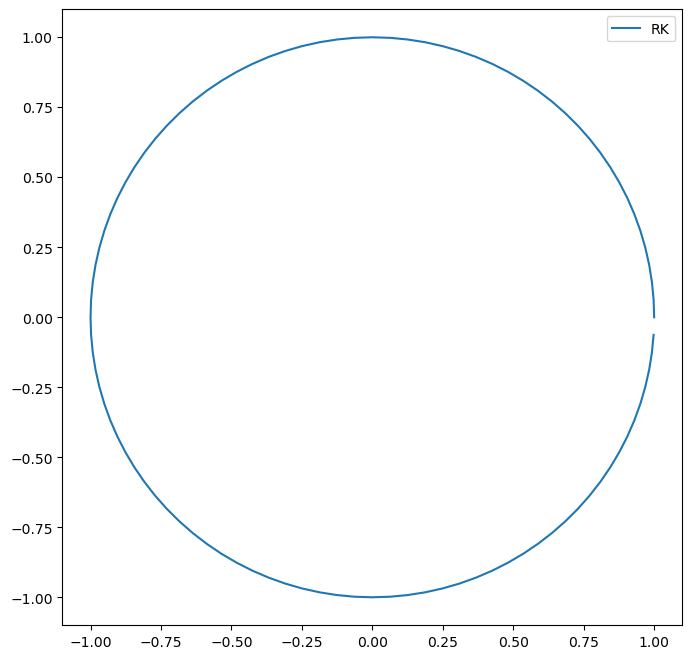

In [ ]:
t_rk, X_rk = RK_method(circle, t_span, X0, n_steps, a, b, c)

plt.figure(figsize=(8,8))
plt.plot(X_rk[:, 0], X_rk[:, 1], label="RK")
plt.legend()
plt.show()

## Lorenz attractor

In [ ]:
# Parameters of the Lorenz attractor
s, r, u = 10, 28, 8/3

def lorenz(t, X):
    x, y, z = X
    Dx = -s * x + s * y
    Dy = r * x - y - x * z
    Dz = x * y - u * z
    return np.array([Dx, Dy, Dz])

In [ ]:
# Initial condition
t_span = (0, 30)
t0, t_end = t_span
X0 = [1, 0, .5]
n_steps = 3000

In [ ]:
t_lorenz, x_lorenz = RK_method(lorenz, t_span, X0, n_steps, a, b, c)

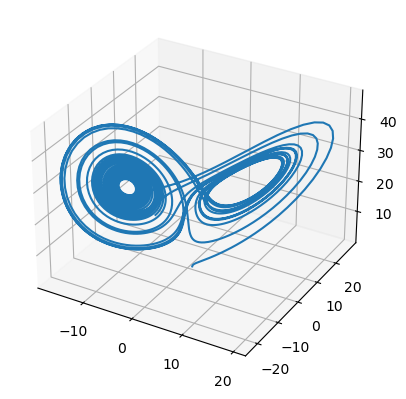

In [ ]:
x, y, z = x_lorenz[:, 0], x_lorenz[:, 1], x_lorenz[:, 2]

ax = plt.figure().add_subplot(projection='3d')

ax.plot(x, y, z)
plt.show()